In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
from cobra.io import read_sbml_model
#make sure model name is up to date!
model = read_sbml_model('iCW773_test7_psilocybin.xml')

No objective coefficients in model. Unclear what should be optimized


In [3]:
#to set optimization (this is the production of psilocybin from the precursor)
with model:
    model.objective = model.reactions.DM_psi_c
    print(model.optimize().objective_value)

5.692998837082844e-05


In [4]:
model.reactions.query('biomass','name')

[<Reaction CG_biomass_cgl_ATCC13032 at 0x1daeb613eb0>,
 <Reaction EX_biomass at 0x1daeb9788b0>]

In [5]:
#maybe add some other carbon source here
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [6]:
model.reactions.CG_biomass_cgl_ATCC13032

Reaction identifier,CG_biomass_cgl_ATCC13032
Name,cgl biomass objective function (ATCC13032)
Memory address,0x01daeb613eb0
Stoichiometry,0.098705 arabino_c + 47.7 atp_c + 0.01039 dna_c + 47.7 h2o_c + 0.062224 ions_c + 0.10598 mycoli_c + 0.098705 peptid_c + 0.029092 phosph_c + 0.54028 protein_c + 0.05195 rna_c + 0.002679... 0.098705 arabino + 47.7 ATP + 0.01039 DNA + 47.7 H2O + 0.062224 ions + 0.10598 mycoli + 0.098705 peptid + 0.029092 phosph + 0.54028 protein + 0.05195 rna + 0.002679 soluble_pool --> 47.7 ADP +...
GPR,
Lower bound,0.0
Upper bound,0.428929662134894


In [7]:
model.reactions.query('o2','id')

[<Reaction EX_co2_e at 0x1daeb762790>,
 <Reaction EX_no2_e at 0x1daeb784850>,
 <Reaction EX_o2_e at 0x1daeb784910>,
 <Reaction EX_o2s_e at 0x1daeb784970>]

In [8]:
ppp_base = production_envelope(
    model, ["EX_o2_e"], objective="DM_psi_c", carbon_sources="EX_glc_e") #with high oxygen

In [9]:
ppp_base

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc_e,0.0,0.0,0.0,0.000000,2.290281e-16,1.806791e-16,-16.161130
1,EX_glc_e,0.0,0.0,0.0,0.000057,2.438115e-05,1.923417e-05,-15.405641
2,EX_glc_e,0.0,0.0,0.0,0.000057,2.438115e-05,1.923417e-05,-14.650152
3,EX_glc_e,0.0,0.0,0.0,0.000057,2.438115e-05,1.923417e-05,-13.894662
4,EX_glc_e,0.0,0.0,0.0,0.000057,2.438115e-05,1.923417e-05,-13.139173
5,EX_glc_e,0.0,0.0,0.0,0.000057,2.438115e-05,1.923417e-05,-12.383683
6,EX_glc_e,0.0,0.0,0.0,0.000057,2.438115e-05,1.923417e-05,-11.628194
7,EX_glc_e,0.0,0.0,0.0,0.000057,2.438115e-05,1.923417e-05,-10.872704
8,EX_glc_e,0.0,0.0,0.0,0.000057,2.438115e-05,1.923417e-05,-10.117215
9,EX_glc_e,0.0,0.0,0.0,0.000057,2.438115e-05,1.923417e-05,-9.361725


<AxesSubplot:xlabel='EX_o2_e'>

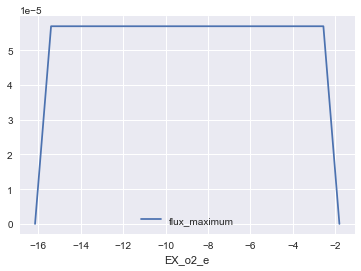

In [10]:
ppp_base.plot(x='EX_o2_e', y='flux_maximum')

In [11]:
ppp_precursor = production_envelope(
    model, ["EX_o2_e"], objective="psiK2", carbon_sources="EX_glc_e")

In [12]:
ppp_precursor

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc_e,0.0,0.0,NaN,3.585758,2.815370e+00,NaN,-16.161130
1,EX_glc_e,0.0,0.0,NaN,3.963502,3.111958e+00,NaN,-15.405641
2,EX_glc_e,0.0,0.0,NaN,4.341247,3.408545e+00,NaN,-14.650152
3,EX_glc_e,0.0,0.0,NaN,4.718992,3.705133e+00,NaN,-13.894662
4,EX_glc_e,0.0,0.0,NaN,5.096736,4.001720e+00,NaN,-13.139173
5,EX_glc_e,0.0,0.0,NaN,5.415793,4.252229e+00,NaN,-12.383683
6,EX_glc_e,0.0,0.0,NaN,5.570437,4.373648e+00,NaN,-11.628194
7,EX_glc_e,0.0,0.0,NaN,5.570437,4.373648e+00,NaN,-10.872704
8,EX_glc_e,0.0,0.0,NaN,5.570437,4.373648e+00,NaN,-10.117215
9,EX_glc_e,0.0,0.0,NaN,5.566607,4.370641e+00,NaN,-9.361725


<AxesSubplot:xlabel='EX_o2_e'>

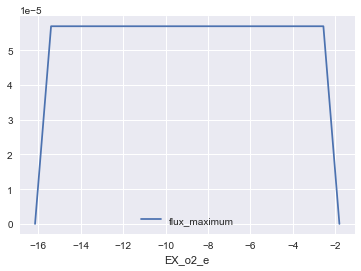

In [13]:
ppp_base.plot(x='EX_o2_e', y='flux_maximum')

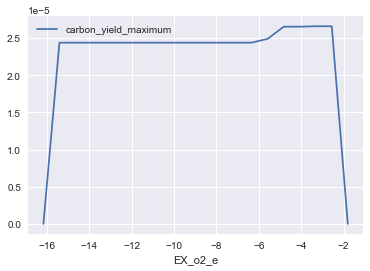

In [14]:
ppp_base.plot(
    kind='line', x='EX_o2_e', y='carbon_yield_maximum');

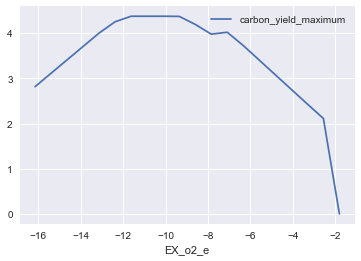

In [15]:
ppp_precursor.plot(
    kind='line', x='EX_o2_e', y='carbon_yield_maximum');

In [16]:
medium = model.medium
medium["EX_o2_e"] = 100     
model.medium = medium

model.medium

{'EX_ca2_e': 0.0144877134286247,
 'EX_cobalt2_e': 7.00338234344926e-05,
 'EX_cu2_e': 0.00197271722237563,
 'EX_fe2_e': 0.16239125,
 'EX_fe3_e': 0.0217300637039616,
 'EX_glc_e': 4.67,
 'EX_k_e': 0.543285250115532,
 'EX_mg2_e': 0.0241459221505149,
 'EX_mn2_e': 0.00192443552016793,
 'EX_nh4_e': 11.9121416666662,
 'EX_ni2_e': 0.00089824250292982,
 'EX_o2_e': 100,
 'EX_pi_e': 0.918000000000888,
 'EX_so4_e': 4.01673156249995,
 'EX_zn2_e': 0.000948926279874219,
 'EX_BIOTIN': 1.01925397503027e-06,
 'EX_cl': 0.0144877134286247}

In [17]:
ppp_psi2_oxy = production_envelope(model,
                reactions=[model.reactions.EX_o2_e],
                objective=[model.reactions.DM_psi_c])

<AxesSubplot:xlabel='EX_o2_e'>

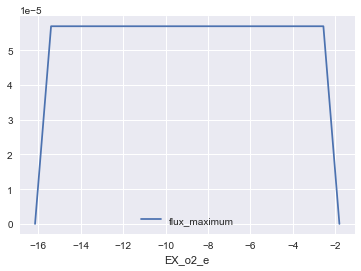

In [18]:
ppp_psi2_oxy.plot(x='EX_o2_e', y='flux_maximum')

In [19]:
model.medium

{'EX_ca2_e': 0.0144877134286247,
 'EX_cobalt2_e': 7.00338234344926e-05,
 'EX_cu2_e': 0.00197271722237563,
 'EX_fe2_e': 0.16239125,
 'EX_fe3_e': 0.0217300637039616,
 'EX_glc_e': 4.67,
 'EX_k_e': 0.543285250115532,
 'EX_mg2_e': 0.0241459221505149,
 'EX_mn2_e': 0.00192443552016793,
 'EX_nh4_e': 11.9121416666662,
 'EX_ni2_e': 0.00089824250292982,
 'EX_o2_e': 100,
 'EX_pi_e': 0.918000000000888,
 'EX_so4_e': 4.01673156249995,
 'EX_zn2_e': 0.000948926279874219,
 'EX_BIOTIN': 1.01925397503027e-06,
 'EX_cl': 0.0144877134286247}

In [20]:
ppp_high_oxy_prod = production_envelope(model,
                reactions=[model.reactions.EX_glc_e],
                objective=[model.reactions.DM_psi_c])

<AxesSubplot:xlabel='EX_glc_e'>

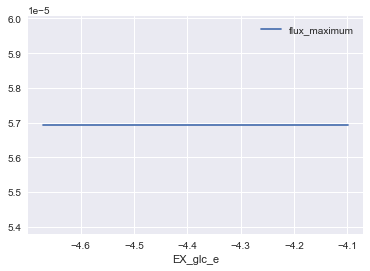

In [21]:
ppp_high_oxy_prod.plot(x='EX_glc_e', y='flux_maximum') #big difference between DM_psi_c and psiK2

In [22]:
ppp_high_oxy_growth = production_envelope(model,
                reactions=[model.reactions.EX_glc_e],
                objective=[model.reactions.CG_biomass_cgl_ATCC13032])

C:\Users\tamwei\Anaconda3\lib\site-packages\cobra\core\metabolite.py:102: UserWarning: 26.227799999999995 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  warn(
C:\Users\tamwei\Anaconda3\lib\site-packages\cobra\core\metabolite.py:102: UserWarning: 47.309599999999996 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  warn(
C:\Users\tamwei\Anaconda3\lib\site-packages\cobra\core\metabolite.py:102: UserWarning: 21.0818 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  warn(
C:\Users\tamwei\Anaconda3\lib\site-packages\cobra\core\metabolite.py:102: UserWarning: 1.809384 is not an integer (in formula O1.809384S0.452346Fe1.514453Ca0.542815Co0.002624Cu0.073913K20.35556Mg0.904692Mn0.072104Ni0.033655Zn0.035554Cl0.542815)
  warn(
C:\Users\tamwei\Anaconda3\lib\site-packages\cobra\core\metabolite.py:102: UserWarning: 0.452346 is not an integer (in formula O1.809384S0.452346Fe1.514453Ca0.542815Co0.002624Cu0.0739

<AxesSubplot:xlabel='EX_glc_e'>

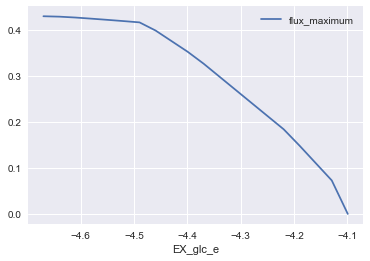

In [23]:
ppp_high_oxy_growth.plot(x='EX_glc_e', y='flux_maximum') # extend range of glucose

In [24]:
from cobra.medium import minimal_medium

max_growth = model.slim_optimize()
absmin = minimal_medium(model, max_growth)

In [25]:
absmin

EX_glc_e    4.116257
EX_nh4_e    0.286035
EX_o2_e     1.824766
EX_so4_e    1.881979
dtype: float64

In [26]:
medium = model.medium
medium["EX_o2_e"] = absmin.EX_o2_e     
model.medium = medium

model.medium

{'EX_ca2_e': 0.0144877134286247,
 'EX_cobalt2_e': 7.00338234344926e-05,
 'EX_cu2_e': 0.00197271722237563,
 'EX_fe2_e': 0.16239125,
 'EX_fe3_e': 0.0217300637039616,
 'EX_glc_e': 4.67,
 'EX_k_e': 0.543285250115532,
 'EX_mg2_e': 0.0241459221505149,
 'EX_mn2_e': 0.00192443552016793,
 'EX_nh4_e': 11.9121416666662,
 'EX_ni2_e': 0.00089824250292982,
 'EX_o2_e': 1.8247658329851104,
 'EX_pi_e': 0.918000000000888,
 'EX_so4_e': 4.01673156249995,
 'EX_zn2_e': 0.000948926279874219,
 'EX_BIOTIN': 1.01925397503027e-06,
 'EX_cl': 0.0144877134286247}

In [27]:
ppp_low_oxy_prod = production_envelope(model,
                reactions=[model.reactions.EX_glc_e],
                objective=[model.reactions.DM_psi_c])

<AxesSubplot:xlabel='EX_glc_e'>

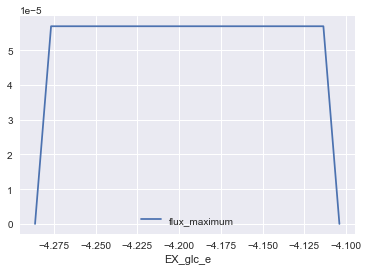

In [28]:
ppp_low_oxy_prod.plot(x='EX_glc_e', y='flux_maximum')

In [29]:
ppp_low_oxy_growth = production_envelope(model,
                reactions=[model.reactions.EX_glc_e],
                objective=[model.reactions.CG_biomass_cgl_ATCC13032])

C:\Users\tamwei\Anaconda3\lib\site-packages\cobra\core\metabolite.py:102: UserWarning: 26.227799999999995 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  warn(
C:\Users\tamwei\Anaconda3\lib\site-packages\cobra\core\metabolite.py:102: UserWarning: 47.309599999999996 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  warn(
C:\Users\tamwei\Anaconda3\lib\site-packages\cobra\core\metabolite.py:102: UserWarning: 21.0818 is not an integer (in formula C26.227799999999995H47.309599999999996O21.0818)
  warn(
C:\Users\tamwei\Anaconda3\lib\site-packages\cobra\core\metabolite.py:102: UserWarning: 1.809384 is not an integer (in formula O1.809384S0.452346Fe1.514453Ca0.542815Co0.002624Cu0.073913K20.35556Mg0.904692Mn0.072104Ni0.033655Zn0.035554Cl0.542815)
  warn(
C:\Users\tamwei\Anaconda3\lib\site-packages\cobra\core\metabolite.py:102: UserWarning: 0.452346 is not an integer (in formula O1.809384S0.452346Fe1.514453Ca0.542815Co0.002624Cu0.0739

<AxesSubplot:xlabel='EX_glc_e'>

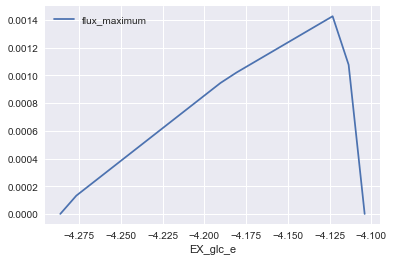

In [30]:
ppp_low_oxy_growth.plot(x='EX_glc_e', y='flux_maximum')

In [37]:
medium = model.medium
medium["EX_o2_e"] = 100 
medium["EX_glc_e"] = 100
model.medium = medium

model.medium

{'EX_ca2_e': 0.0144877134286247,
 'EX_cobalt2_e': 7.00338234344926e-05,
 'EX_cu2_e': 0.00197271722237563,
 'EX_fe2_e': 0.16239125,
 'EX_fe3_e': 0.0217300637039616,
 'EX_glc_e': 100,
 'EX_k_e': 0.543285250115532,
 'EX_mg2_e': 0.0241459221505149,
 'EX_mn2_e': 0.00192443552016793,
 'EX_nh4_e': 11.9121416666662,
 'EX_ni2_e': 0.00089824250292982,
 'EX_o2_e': 100,
 'EX_pi_e': 0.918000000000888,
 'EX_so4_e': 4.01673156249995,
 'EX_zn2_e': 0.000948926279874219,
 'EX_BIOTIN': 1.01925397503027e-06,
 'EX_cl': 0.0144877134286247}

In [45]:
ppp_test = production_envelope(model,
                reactions=[model.reactions.EX_glc_e],
                objective=[model.reactions.psiM2])

In [46]:
ppp_test

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc_e
0,EX_glc_e,0.0,0.000000e+00,NaN,0.000057,0.000043,NaN,-5.734630
1,EX_glc_e,0.0,0.000000e+00,NaN,0.000057,0.000044,NaN,-5.648547
2,EX_glc_e,0.0,0.000000e+00,NaN,0.000057,0.000044,NaN,-5.562465
3,EX_glc_e,0.0,0.000000e+00,NaN,0.000057,0.000045,NaN,-5.476382
4,EX_glc_e,0.0,0.000000e+00,NaN,0.000057,0.000046,NaN,-5.390299
5,EX_glc_e,0.0,0.000000e+00,NaN,0.000057,0.000047,NaN,-5.304217
6,EX_glc_e,0.0,0.000000e+00,NaN,0.000057,0.000047,NaN,-5.218134
7,EX_glc_e,0.0,0.000000e+00,NaN,0.000057,0.000048,NaN,-5.132052
8,EX_glc_e,0.0,0.000000e+00,NaN,0.000057,0.000049,NaN,-5.045969
9,EX_glc_e,0.0,0.000000e+00,NaN,0.000057,0.000050,NaN,-4.959886


<AxesSubplot:xlabel='EX_glc_e'>

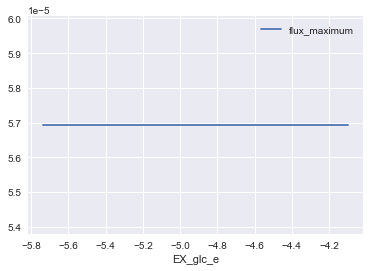

In [47]:
ppp_test.plot(x='EX_glc_e', y='flux_maximum')

In [48]:
model.reactions.EX_glc_e

Reaction identifier,EX_glc_e
Name,D_Glucose exchange
Memory address,0x01daeb772670
Stoichiometry,glc_D_e <-- D_Glucose <--
GPR,
Lower bound,-100
Upper bound,-4.09906


In [49]:
model.reactions.EX_o2_e

Reaction identifier,EX_o2_e
Name,O2 exchange
Memory address,0x01daeb784910
Stoichiometry,o2_e <-- O2 <--
GPR,
Lower bound,-100
Upper bound,-1.44076799999993
